Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **43 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Andriy Kashyrskyy"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Randomly built BSTs

## Part A. Average number of comparisons when searching

## Question 0 [time estimate: 1 minute] 

Paste in the working code from last session's PCW for the class Node, which contains the methods for insertion, searching, and deletion. 



In [2]:
## Binary Search Tree
## added methods from Prof. Scheffler's github shared via email

class Node:

    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val

    def insert(self, node):
        """
        Inserts a node into a *non-empty* tree rooted at the node, returns
        the root.
        """
        if self.data > node.data:
            if self.l_child is None:
                self.l_child = node
                node.parent = self
            else:
                self.l_child.insert(node)
        else: #if self.data < node.data:
            if self.r_child is None:
                self.r_child = node
                node.parent = self
            else:
                self.r_child.insert(node)
        return self
    
    def minimum(self):
        node = self
        while node.l_child != None:
            node = node.l_child
        return node

    def search_data(self, value):
        """
        Searches a *non-empty* tree rooted at the node for a node with
        data = value, returns the value if found, None otherwise.
        """
        node = self.search(value)
        if node:
            return node.data
        else:
            return node
        
    def to_string(self): 
        print('self.data', self.data)
        root=self
        if not root: 
            return 'Nil'
        else: 
            r = root.r_child.to_string() if root.r_child else 'Nil'
            l = root.l_child.to_string() if root.l_child else 'Nil'
        return 'Node(' + str(root.data) + ' L: ' + l + ' R: ' + r + ')'

    def delete(self, value):
        def transplant(node1, node2):
            """
            Replaces the subtree rooted at node1 with the subtree rooted at node2.
            """
            nonlocal root
            if node1.parent == None:
                root = node2
            elif node1 == node1.parent.l_child:
                node1.parent.l_child = node2
            else:
                node1.parent.r_child = node2
            if node2 != None:
                node2.parent = node1.parent

        # If a node with data = value is present in the tree rooted at Node,
        # deletes that node and returns the root.
        root = self
        node = root.search(value)
        if node:
            if node.l_child is None:
                transplant(node, node.r_child)
            elif node.r_child == None:
                transplant(node, node.l_child)
            else:
                y = node.r_child.minimum() # y = minimum(node.r_child)
                if y.parent != node:
                    transplant(y, y.r_child)
                    y.r_child = node.r_child
                    y.r_child.parent = y
                transplant(node, y)
                y.l_child = node.l_child
                y.l_child.parent = y
        return root
    
    def search(self, value):
        """
        Searches a *non-empty* tree rooted at the node for a node with
        data = value, returns the node if found, None otherwise.
        """
        if value == self.data:
            return self
        elif value < self.data:
            if self.l_child:
                return self.l_child.search(value)
            else:
                return None
        else:
            if self.r_child:
                return self.r_child.search(value)
            else:
                return None
    
    def inorder(self): 
        """
        Returns a list of all data in the tree rooted at root produced
        using an in order traversal.
        """
        lst = []
        root = self
        def sub_inorder(root):
            if not root is None:
                sub_inorder(root.l_child)
                lst.append(root.data)
                sub_inorder(root.r_child)
        sub_inorder(root)
        return lst


## Question 1 [time estimate: 5 minutes]

Complete the following function that computes the depth of a given node in a BST identified by its root. Use the test below to make sure your code works properly (Optional: Why does the test work?)

In [3]:
def depth(root, node):
    """
    Finds the depth of the node in a BST. depth of root is 0.

    Parameters
    ----------
    root 
        A node, the root of the BST
    node 
        A node to compute the depth of

    Returns
    -------
    d : int 
        Distance from node to root
        
    """
    ## if root is equal to the node, return 0 (same depth of 0, on level 0)
    if root.data == node.data:
        return 0
    ## if root is bigger than the node, add 1 and call depth() on left child node
    elif root.data > node.data:
        return 1 + depth(root.l_child, node)
    ## if root is smaller than the node, add 1 and call depth() on right child node
    else: # if root.data < node.data:
        return 1 + depth(root.r_child, node)
    ## return calculated depth value

In [4]:
import math

# Testing code 
bst = None
nodes = [Node(15), Node(6), Node(18), Node(3), Node(7), 
         Node(17), Node(20), Node(2), Node(4)]
for node in nodes:
    if not bst:
        bst = node
    else:
        bst.insert(node)
#         insert(bst, node)
for i in range(len(nodes)):
    assert(depth(bst, nodes[i]) == int(math.log(i+1,2)))

In [5]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2 [time estimate: 5 minutes]

Complete the following function, making use of `depth`, to calculate the average number of comparisons required to search for a randomly chosen element of a standard BST. For example, the following tree:

                            12
                              \
                               14

will have an average number of comparisons of 1.5. This is because 50% of the time we will be searching for 12 (1 comparison), and 50% of the time we will be searching for 14 (2 comparisons).

You can test your function with this test case by constructing the tree using the code from the last session's pre-class work. 


(*Hint*: the number of comparisons required to search for node a is `depth(root, a) + 1`.) 

In [6]:
def avg_cmp(bst):
    """
    Finds the average number of comparisons required 
    to search for a randomly chosen element of a standard BST. 
    
    Parameters
    ----------
    bst 
        A Node, the root of the BST
    
    Returns
    -------
    n : float
        Average number of comparisons
        
    """
    comparisons_all = [] # creating an empty list for all 
                         #comparisons to be stored
    
    ## defining inner comparisons function
    def comparisons(tree):
        ## if tree node is not equal to None (if it's value isn't None)
        if tree is not None:
            comparisons(tree.l_child)
            comparisons(tree.r_child)
            ## number of comparisons calculated as depth of tree + 1
            n = depth(bst, tree)+1
            ## appending number of comparisons to the list
            comparisons_all.append(n)
            
    ## calling comparisons on the tree with nodes 
    ## which goes through left and right sides of the tree
    comparisons(bst)
    ## printing list with comparisons
    ## print(comparisons_all)
    
    ## taking an average as a sum divided by length, returning it
    average = sum(comparisons_all)/len(comparisons_all)
    return average

In [7]:
## testing

bst = None
nodes = [Node(12), Node(14)]
for node in nodes:
    if not bst:
        bst = node
    else:
        bst.insert(node)
avg_cmp(bst)

1.5

In [8]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Part B. Depth of randomly-built trees
The average number of comparisons for a randomly chosen element within the tree is related to the “average depth” of the tree. Here the average depth of a tree is defined to be the average of the depths of all the nodes in the tree. 

## Question 1 [time estimate: 10 minutes]

Complete the following function to find the maximum depth of a node in a given BST. The function must run in $\mathrm{O}(N)$ time and use $\mathrm{O}(h)$ space (where $N$ is the number of elements in the BST and $h$ is the height of the tree). Also, note that the maximum depth is equal to the height of the tree.


In [9]:
def max_depth(bst):
    """
    Finds the maximum depth of node in a BST.
    
    Parameters
    ----------
    bst 
        A Node, the root of the BST
    
    Returns
    -------
    h : int
        The maximum depth in a BST
        
    """
    ## creating empty lists to store left and right depths
    depth_l = [] 
    depth_r = []
    
    if not bst:
        return 0
    ## find max_depth (recursively) for left and right child nodes
    else:
        depth_l.append(max_depth(bst.l_child))
        depth_r.append(max_depth(bst.r_child))
        
    #print(depth_l)
    #print(depth_r)
    
    #return the maximum value + 1
    return max(max(depth_l), max(depth_r)) + 1

In [10]:
## testing 
bst = None
for node in [Node(_) for _ in range(1000)]:
    if not bst:
        bst = node
    else:
        bst.insert(node)
        
max_depth(bst)

1000

In [11]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2 [time estimate: 5 minutes]

Using the `avg_cmp` function, complete the following function to return the average depth of the tree. The average depth is related to the average number of comparisons as `average depth = (average comparisons - 1)`, since the root has depth zero.

In [12]:
def avg_depth(bst):
    """
    Computes the average depth of a BST
    
    Parameters
    ----------
    bst
        A Node, root of the BST
    
    Returns
    -------
    avg_d : float
        Average depth of the BST
        
    """
    ## calculating average depth
    average_depth = avg_cmp(bst) - 1
    ## returning average depth
    return average_depth 

In [13]:
# testing 

bst = None
nodes = [Node(12), Node(14), Node(16)]
for node in nodes:
    if not bst:
        bst = node
    else:
        bst.insert(node)
        
avg_depth(bst)

1.0

In [14]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 3 [time estimate: 10 minutes]
Now, insert randomly shuffled lists into BSTs, and measure the average depth and the maximum depth. How do these statistics scale as you increase $N$, the number of nodes? Make sure to give a compelling argument that motivates this scaling behaviour (you do not need to provide a technical derivation).

The maximum depth will scale as the overall height of the tree h. The value of h gets bigger with the amount of nodes being inserted in a tree; the best/average running time complexity in that case is also O(log(n)) since we go down two sides of the tree; randomization results in O(log(n) behavior too; however, in worst case this will be O(n), when the tree only has one branch that stems down using single child node for each level. The average depth will also scale as the height h of the given tree. Its average time complexity is also log(n), as seen from the graph below, and its depths value is smaller in the long run over larger number on N, than the depths value related to maximum depth. I believe this relates to the comparisons/splits we are making, and the fact that maximum depth will always have greater (extreme) values than those from average depth (also as to get the average depth we perform the division by the number of nodes N).


## Question 4 [time estimate: 7 minutes]

Produce a plot showing the scaling behavior that you saw of both the average depth and the maximum depth as a function of the length of the shuffled list. For a meaningful figure, be sure to scale out to a list of size 10,000 and average the timings 50 times. (You don’t have to sample each value from 1 to 10,000!). Is this plot in agreement with the theoretical result you obtained in the previous question? Explain. 


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import random

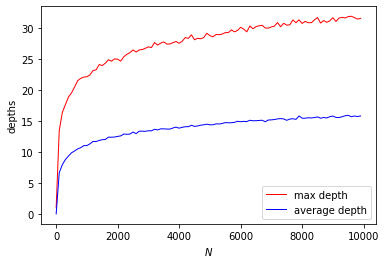

In [16]:
## creating empty lists for plotting (x and y)
N = []
max_depths = []
avg_depths = []

## defining size range
for size in range(1, 10000, 100):
    ## setting maximum and average to 0, these will be updated
    N.append(size) #appending the sizes into N
    maximum = 0
    average = 0
    
    ## running 50 times
    for times in range(51):
        bst = None
        sizes = [size for size in range(1, size+1)]
        ## shuffling randomly
        random.shuffle(sizes)
        
        ## for each node; building a bst with insert() function
        for node in [Node(_) for _ in sizes]:
            if not bst:
                bst = node
            else:
                bst.insert(node)
                
        # updating maximum and average        
        maximum += max_depth(bst)
        maximums = maximum/50
        average += avg_depth(bst)
        averages = average/50
    
    ## appending maximum and average to the lists
    max_depths.append(maximums)
    avg_depths.append(averages)       

## plotting
plt.plot(N, max_depths, color = 'red',label = 'max depth', linewidth = 1.0)
plt.plot(N, avg_depths, color = 'blue',label = 'average depth', linewidth = 1.0)
plt.xlabel('$N$', fontsize=10)
plt.ylabel('depths', fontsize=10)
plt.legend()
plt.show()